In [2]:
import numpy as np
import pandas as pd

In [10]:
path_to_dataset = "./r42short/"

In [11]:
logTypes = ["device","email","file","logon","http"]
logFieldsList = [["date","user","activity"],["date","user","to","cc","bcc"], ["date","user","filename"], ["date","user","activity"], ["date", "user", "url"]]

In [12]:
features = 0
feature_map = {}
def addFeature(name):
    if name not in feature_map:
        global features
        feature_map[name] = features
        features+=1

In [13]:
addFeature("Weekday_Logon_Normal")
addFeature("Weekday_Logon_After")
addFeature("Weekend_Logon")
addFeature("Logoff") 

addFeature("Connect_Normal")
addFeature("Connect_After")
addFeature("Connect_Weekend")
addFeature("Disconnect")

addFeature("Email_In") # All recepients are company email addresses
addFeature("Email_Out") # Sent to a non-company email address

addFeature("File_exe")
addFeature("File_jpg")
addFeature("File_zip")
addFeature("File_txt")
addFeature("File_doc")
addFeature("File_pdf")
addFeature("File_other")

addFeature("url")

In [14]:
def fileFeatures(row):
    if row["filename"].endswith(".exe"):
        return feature_map["File_exe"]
    if row["filename"].endswith(".jpg"):
        return feature_map["File_jpg"]
    if row["filename"].endswith(".zip"):
        return feature_map["File_zip"]
    if row["filename"].endswith(".txt"):
        return feature_map["File_txt"]
    if row["filename"].endswith(".doc"):
        return feature_map["File_doc"]
    if row["filename"].endswith(".pdf"):
        return feature_map["File_pdf"]
    else:
        return feature_map["File_other"]

def emailFeatures(row):
    outsider = False
    if not pd.isnull(row["to"]):
        for address in row["to"].split(";"):
            if not address.endswith("dtaa.com"):
                outsider = True
                
    if not pd.isnull(row["cc"]):
        for address in row["cc"].split(";"):
            if not address.endswith("dtaa.com"):
                outsider = True
                
    if not pd.isnull(row["bcc"]):
        for address in row["bcc"].split(";"):
            if not address.endswith("dtaa.com"):
                outsider = True
    if outsider:
        return feature_map["Email_Out"]
    else:
        return feature_map["Email_In"]

def deviceFeatures(row):
    if row["activity"] == "Connect":
        if row["date"].weekday() < 5:
            if row["date"].hour >= 8 and row["date"].hour < 17:
                return feature_map["Connect_Normal"]
            else:
                return feature_map["Connect_After"]
        else:
            return feature_map["Connect_Weekend"]
    else:
        return feature_map["Disconnect"]
    
def logonFeatures(row):
    if row["activity"] == "Logon":
        if row["date"].weekday() < 5:
            if row["date"].hour >= 8 and row["date"].hour < 17:
                return feature_map["Weekday_Logon_Normal"]
            else:
                return feature_map["Weekday_Logon_After"]
        else:
            return feature_map["Weekend_Logon"]
    else: #Is Logoff
        return feature_map["Logoff"]
    
def httpFeatures(row):
    return feature_map["url"]

def dateToDay(row):
    dayOnly = row["date"].date()
    return dayOnly

In [15]:
logFeatureFunctions = [deviceFeatures, emailFeatures, fileFeatures, logonFeatures, httpFeatures]

In [16]:
dfs = []
for i in range(len(logTypes)):
    logType = logTypes[i]
    logFields = logFieldsList[i]
    logFeatureFunction = logFeatureFunctions[i]
    df = pd.read_csv(path_to_dataset + logType+".csv", usecols=logFields, index_col=None)
    dateFormat = "%m/%d/%Y %H:%M:%S"
    df["date"] = pd.to_datetime( df["date"], format=dateFormat)
    
    newFeature = df.apply(logFeatureFunction, axis=1)
    df["feature"]=newFeature
    
    cols_to_keep = ["date", "user", "feature"]
    df = df[cols_to_keep]
    
    df["date"]=df.apply(dateToDay, axis=1)

    dfs.append(df)

In [17]:
joint = pd.concat(dfs)

In [18]:
joint = joint.sort_values(by="date")

In [19]:
joint

,date,user,feature
0,2010-01-02,MOH0273,6
3018,2010-01-02,NWK0215,17
3019,2010-01-02,NAH0503,17
3020,2010-01-02,AJR0319,17
3021,2010-01-02,IRM0931,17
3022,2010-01-02,NWK0215,17
3023,2010-01-02,AJR0319,17
3024,2010-01-02,AHC0142,17
3025,2010-01-02,NOB0181,17
3026,2010-01-02,WPR0368,17


In [89]:
dates = joint["date"].values
dates = list(dict.fromkeys(dates))
l = len(dates)
timeWindow = int((l+1)/2)
train_dateToIndex = {}
train_indexToDate = {}
test_dateToIndex = {}
test_indexToDate = {}
for k in range(timeWindow):
    date1 = dates[k]
    date2 = dates[k+timeWindow-1]
    train_dateToIndex[date1]=k
    test_dateToIndex[date2]=k
    train_indexToDate[k]=date1
    test_indexToDate[k]=date2
d = train_indexToDate[timeWindow-1]

In [90]:
train_df = joint[joint["date"]<=d]
test_df = joint[joint["date"]>=d]

In [91]:
print(train_df.shape)
print(test_df.shape)

(1266061, 3)
(230884, 3)


In [95]:
def extractTimeSeriesByUser(userName, df):
    return df[df["user"]==userName]

def extractTimeSeriesByDate(date, df):
    return df[df["date"]==date]

def featurizeDay(ts, feature_map):
    fv = np.zeros(len(feature_map))
    counts = ts["feature"].value_counts().to_dict()
    for feature in counts:
        fv[feature]=counts[feature]
    return fv

def featurizeUserTimeSeries(username, df, feature_map, dateToIndex):
    ts = extractTimeSeriesByUser(username, df)
    x = np.zeros((len(feature_map),timeWindow))
    for date in set(ts["date"].values):
        ts2 = extractTimeSeriesByDate(date, ts)
        fv = featurizeDay(ts2,feature_map)
        x[:,dateToIndex[date]]=fv
    return x    

In [96]:
def collectDataset(df, feature_map, dateToIndex):
    users = set(df["user"].values)
    X = np.zeros((len(users),len(feature_map)*timeWindow))
    userToIndex = {}
    indexToUser = {}
    i = 0
    for user in users:
        x = featurizeUserTimeSeries(user, df, feature_map, dateToIndex)
        X[i,:]=x.flatten()
        userToIndex[user]=i
        indexToUser[i]=user
        i+=1
    return X, userToIndex, indexToUser

In [97]:
X_train, train_userToIndex, train_indexToUser = collectDataset(train_df, feature_map, train_dateToIndex)
X_test, test_userToIndex, test_indexToUser = collectDataset(test_df, feature_map, test_dateToIndex)
print(X_train.shape)
print(X_test.shape)

(1000, 432)
(1000, 432)


In [98]:
threatActors = ["AAM0658","AJR0932","BDV0168","BIH0745","BLS0678","BTL0226","CAH0936","DCH0843","EHB0824","EHD0584","FMG0527","FTM0406","GHL0460","HJB0742","JMB0308","JRG0207","KLH0596","KPC0073","LJR0523","LQC0479","MAR0955","MAS0025","MCF0600","MYD0978","PPF0435","RAB0589","RGG0064","RKD0604","TAP0551","WDD0366","AAF0535","ABC0174","AKR0057","CCL0068","CEJ0109","CQW0652","DIB0285","DRR0162","EDB0714","EGD0132","FSC0601","HBO0413","HXL0968","IJM0776","IKR0401","IUB0565","JJM0203","KRL0501","LCC0819","MDH0580","MOS0047","NWT0098","PNL0301","PSF0133","RAR0725","RHL0992","RMW0542","TNM0961","VSS0154","XHW0498","BBS0039","BSS0369","CCA0046","CSC0217","GTD0219","JGT0221","JLM0364","JTM0223","MPM0220","MSO0222"]

In [143]:
threatActorIndicesTrain = set([])
threatActorIndicesTest = set([])
for threatActor in threatActors:
    if threatActor in train_userToIndex:
        threatActorIndicesTrain.add(train_userToIndex[threatActor])
    if threatActor in test_userToIndex:
        threatActorIndicesTest.add(test_userToIndex[threatActor])

In [144]:
train_normalIndices = set(train_indexToUser.keys()) - threatActorIndicesTrain
test_normalIndices = set(test_indexToUser.keys()) - threatActorIndicesTest

In [145]:
y_train = np.zeros(len(X_train))
y_train[list(threatActorIndicesTrain)]=1
y_test = np.zeros(len(X_test))
y_test[list(threatActorIndicesTest)]=1

In [151]:
X_train_normal = X_train[list(train_normalIndices),:]
print(X_train_normal.shape)
X_train_threat = X_train[list(threatActorIndicesTrain),:]
print(X_train_threat.shape)
X_test_normal = X_test[list(test_normalIndices),:]
print(X_test_normal.shape)
X_test_threat = X_test[list(threatActorIndicesTest),:]
print(X_test_threat.shape)

(930, 432)
(70, 432)
(930, 432)
(70, 432)


In [152]:
from sklearn.ensemble import IsolationForest
contaminationParameter = 0.07
IF = IsolationForest(n_estimators=100, max_samples=256,contamination=contaminationParameter)

In [153]:
IF.fit(X_train)

c:\users\etsukerman\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.07,
        max_features=1.0, max_samples=256, n_estimators=100, n_jobs=None,
        random_state=None, verbose=0)

In [154]:
normalScores = IF.decision_function(X_train_normal)

Text(0.5, 1.0, 'Distribution of anomaly score for non threats')

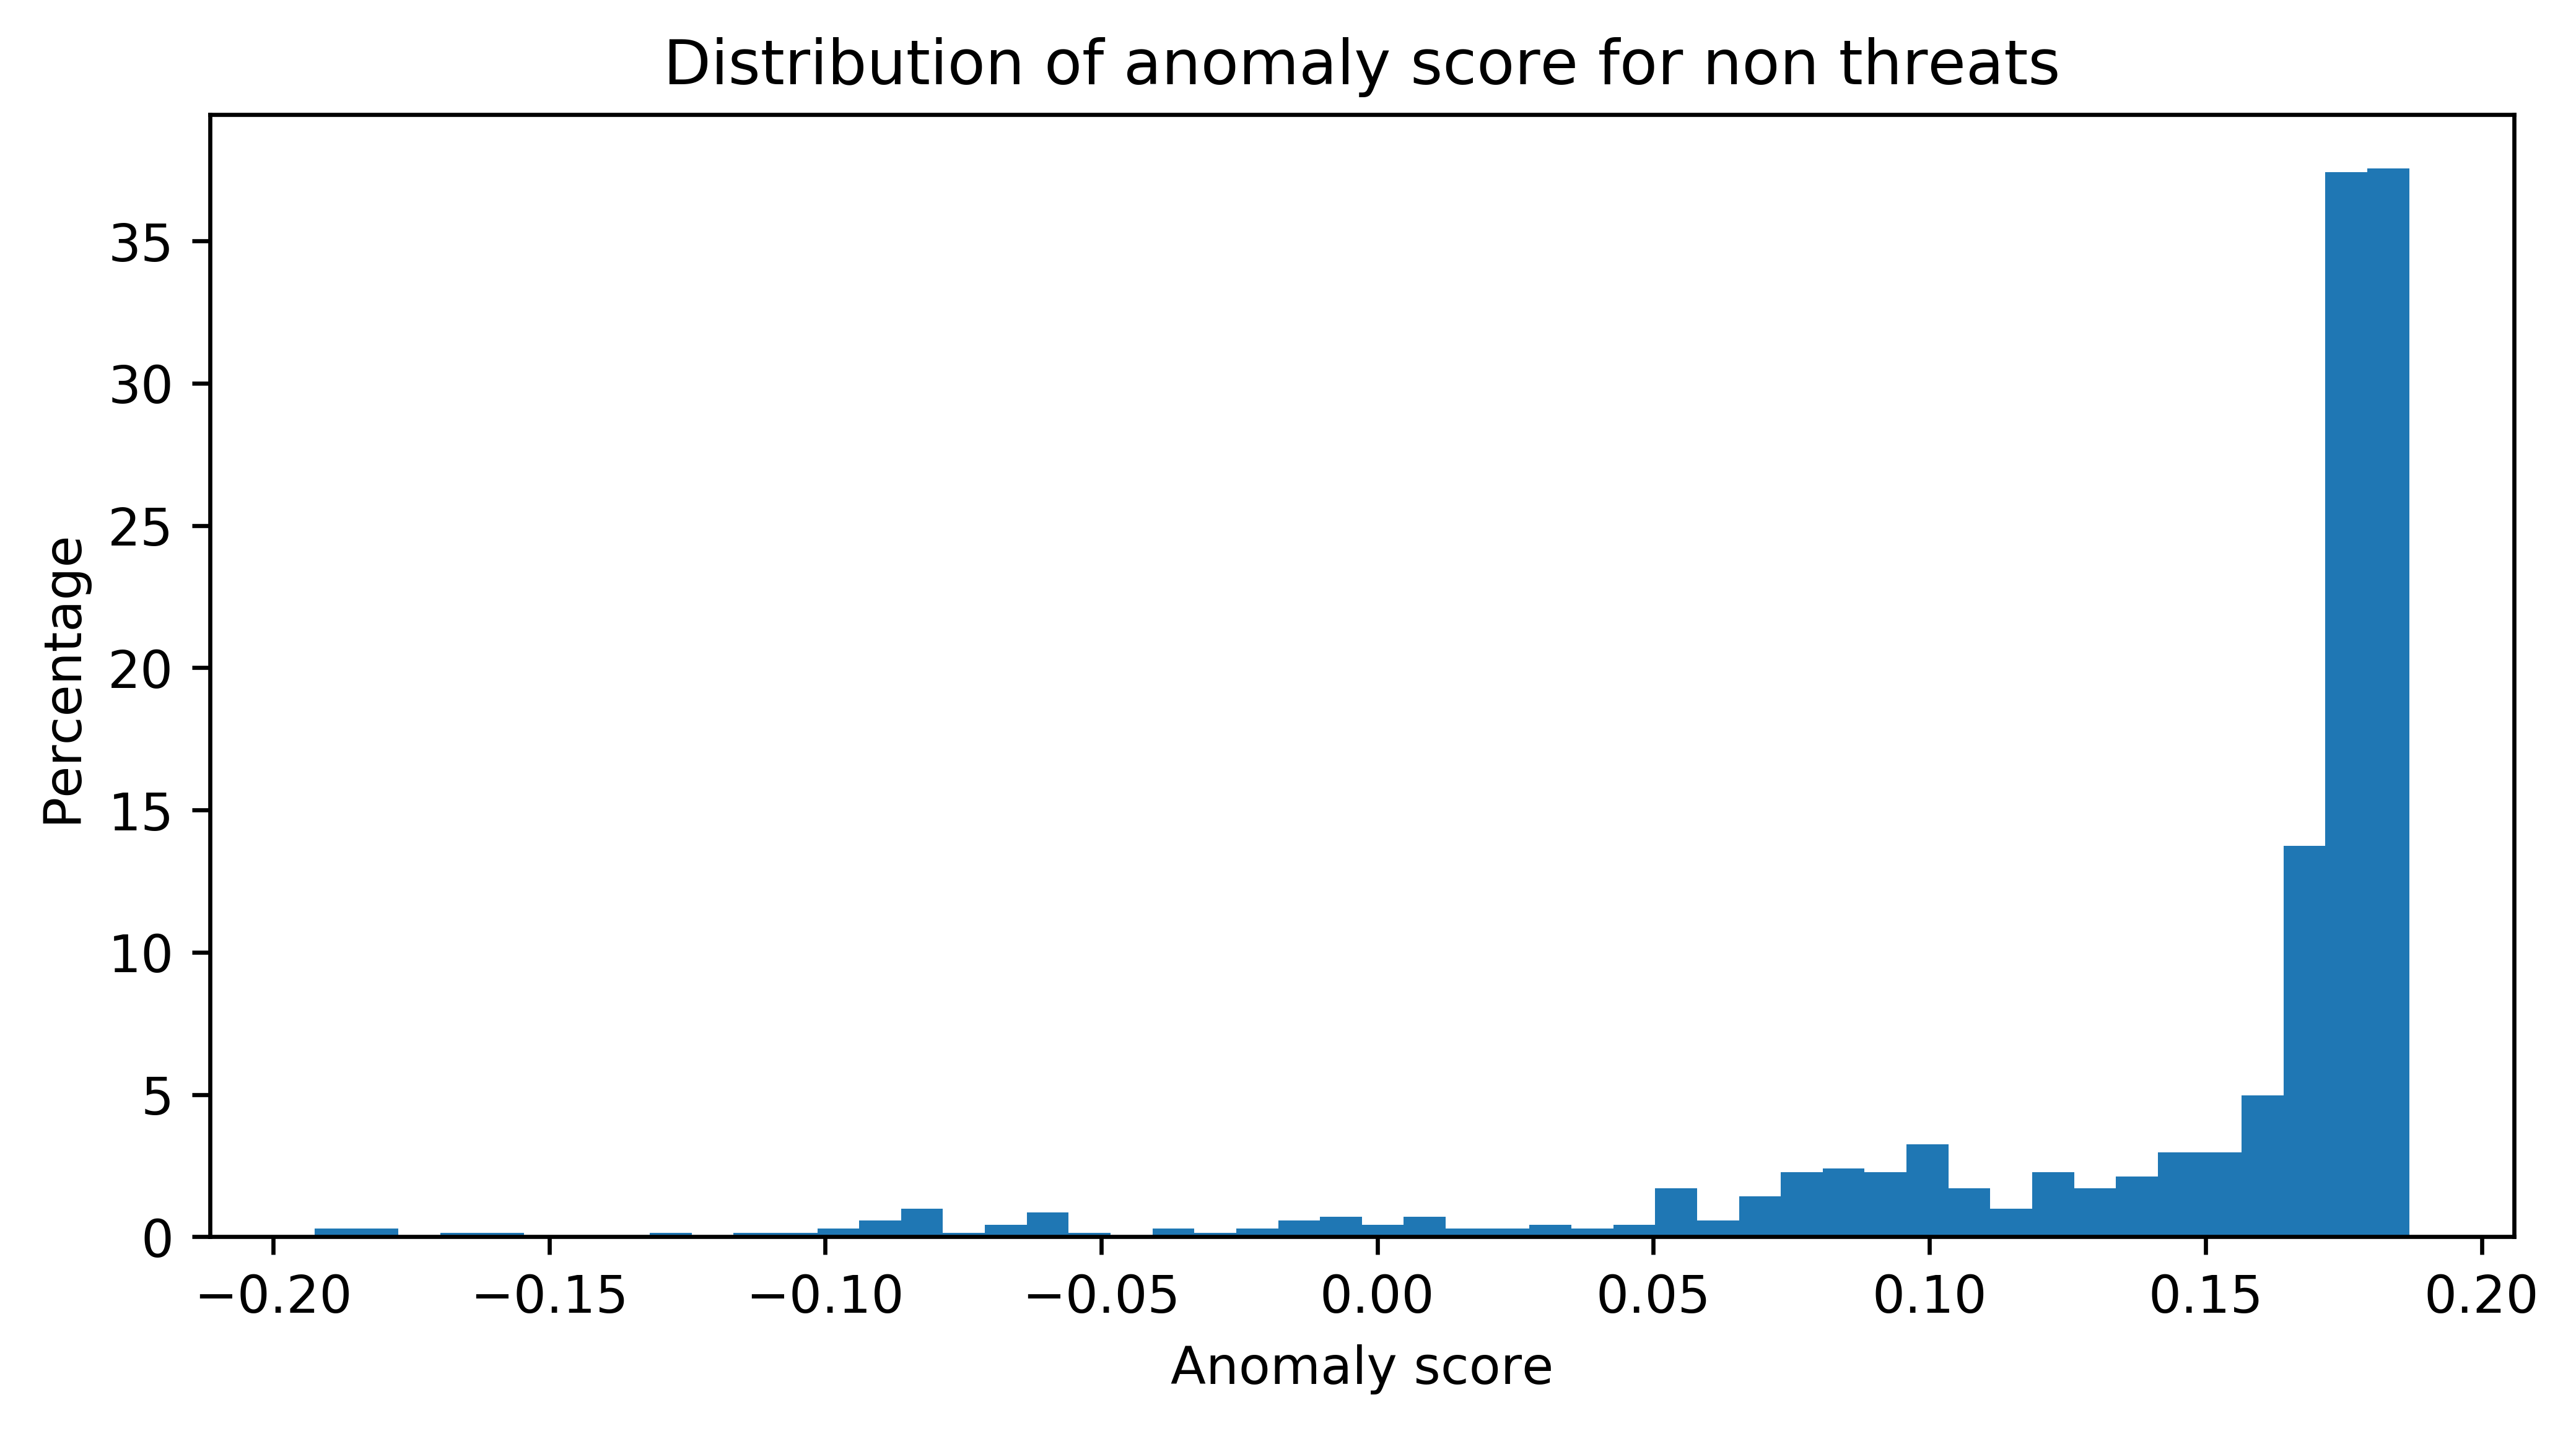

In [155]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 4), dpi=600, facecolor='w', edgecolor='k')

normal = plt.hist(normalScores, 50,density=True)

plt.xlabel('Anomaly score')
plt.ylabel('Percentage')
plt.title("Distribution of anomaly score for non threats")

In [156]:
anomalyScores = IF.decision_function(X_train_threat)

Text(0.5, 1.0, 'Distribution of anomaly score for threats')

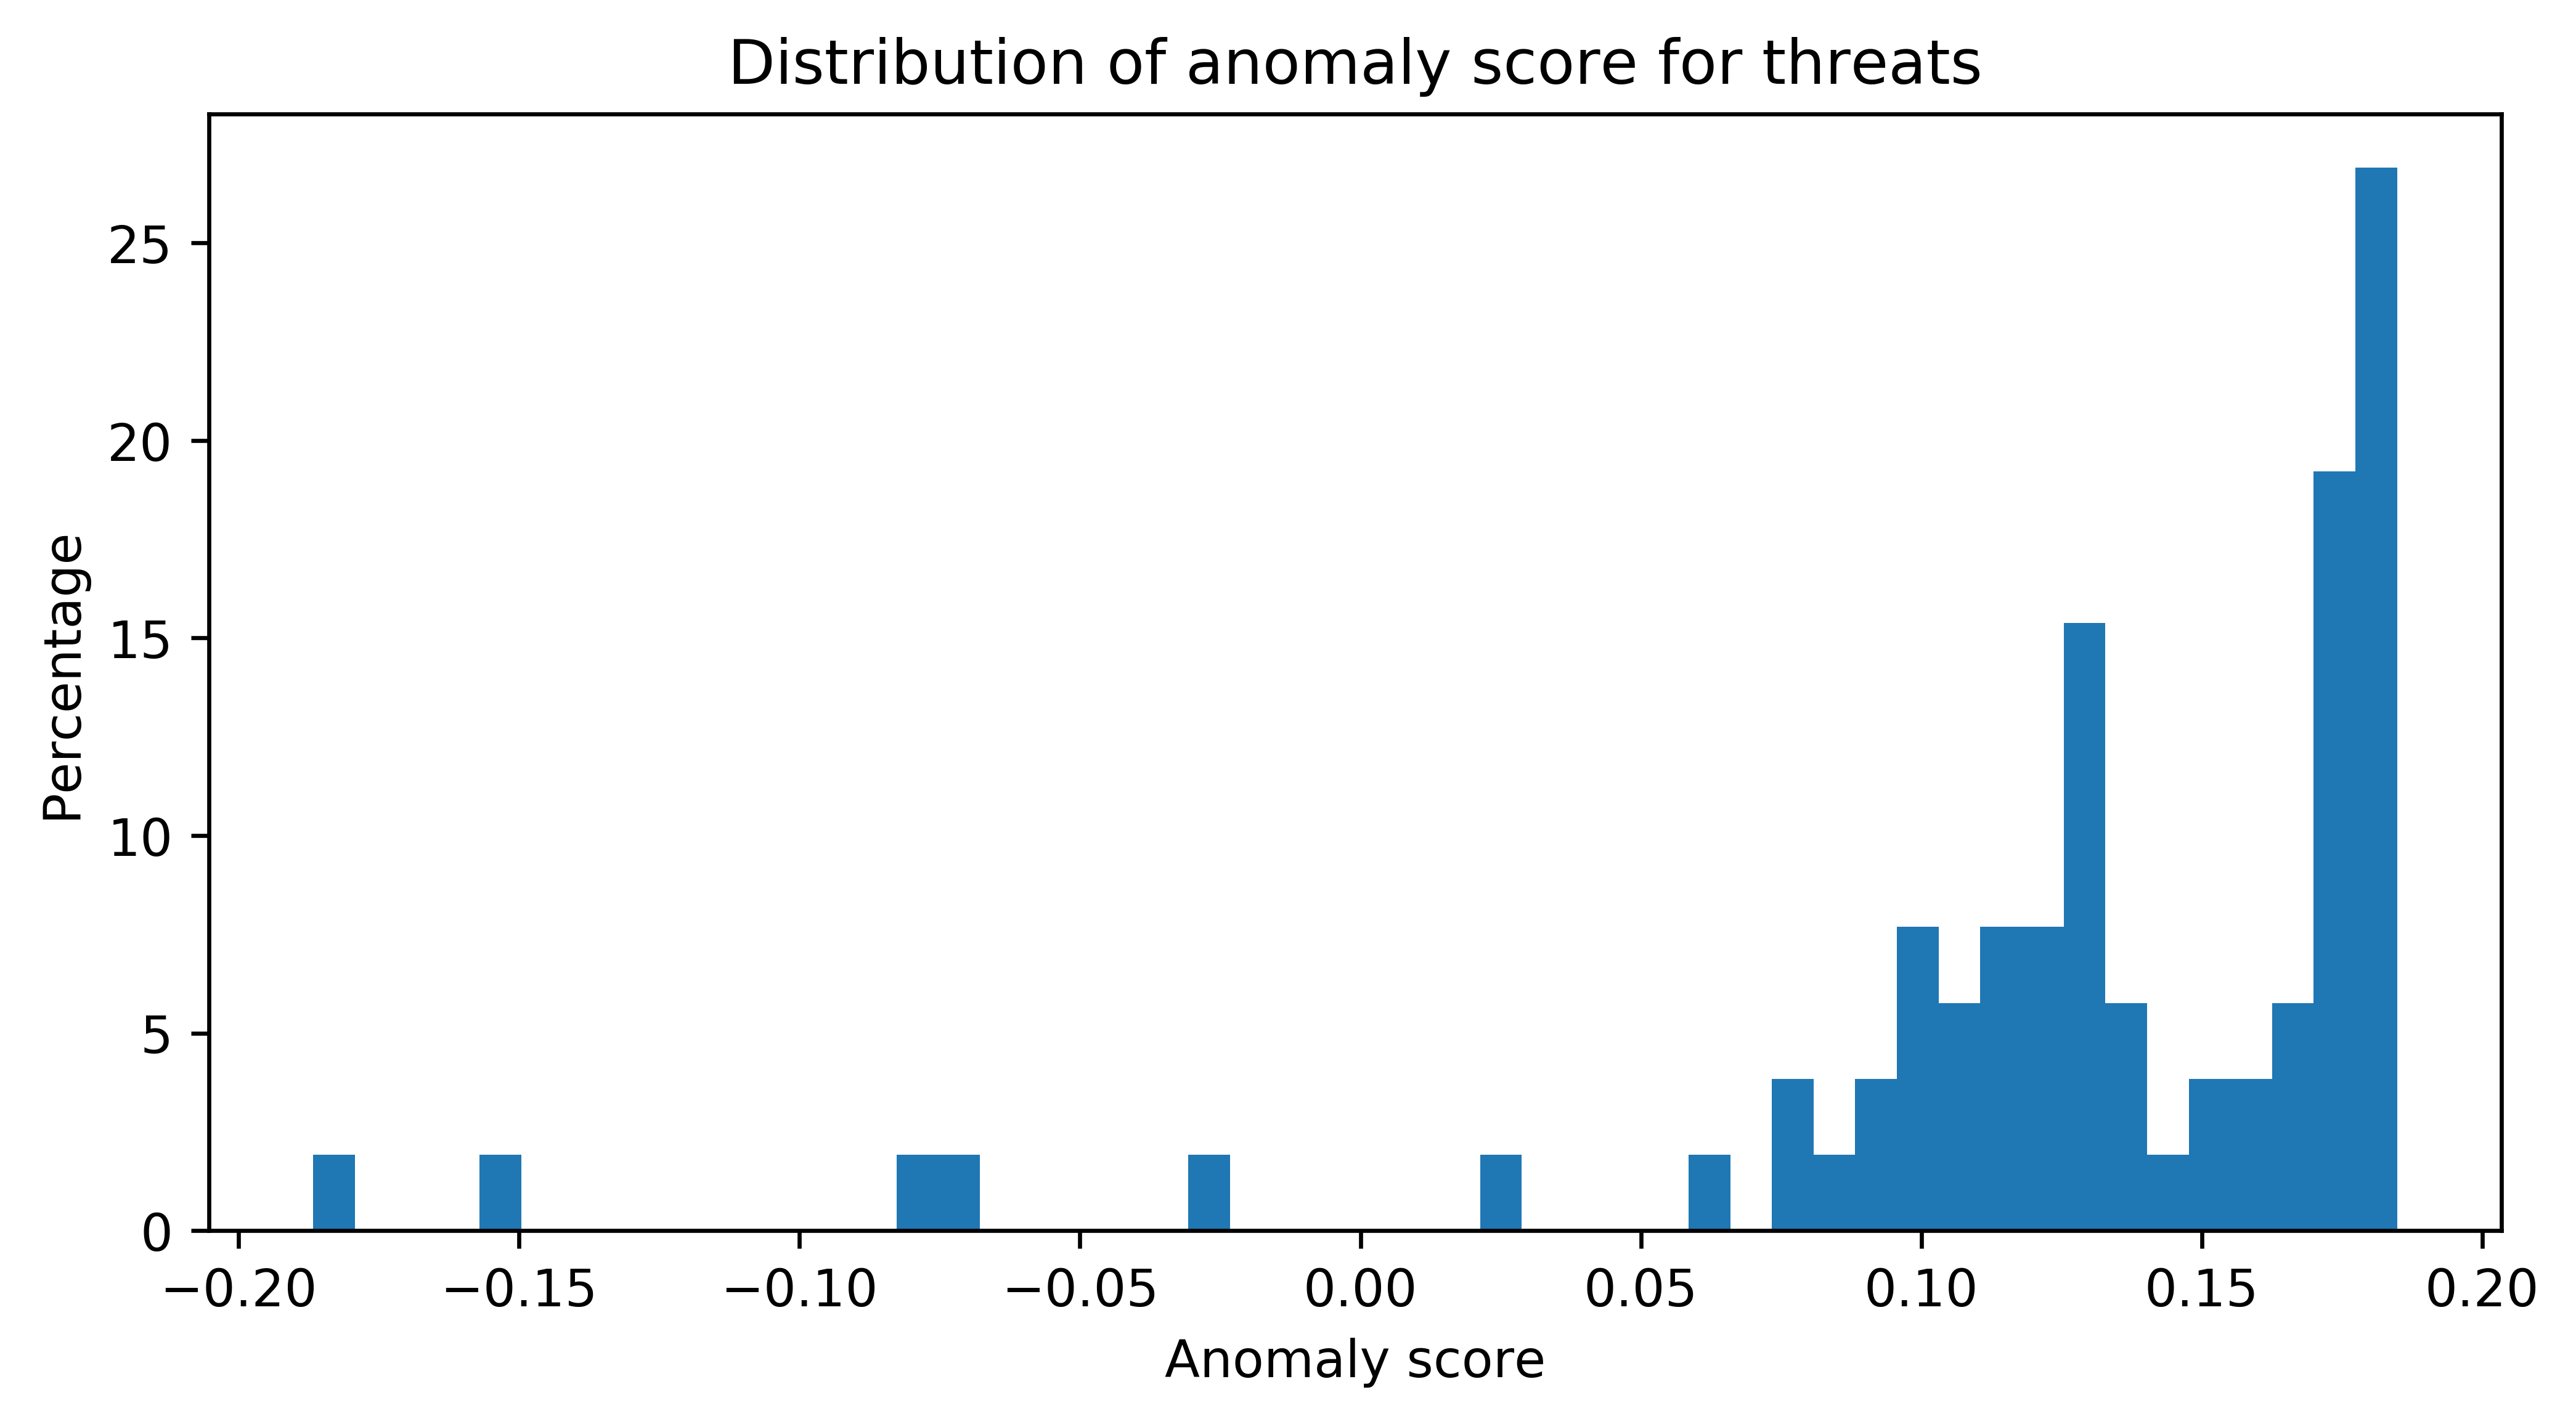

In [157]:

fig = plt.figure(figsize=(8, 4), dpi=600, facecolor='w', edgecolor='k')

anomaly = plt.hist(anomalyScores, 50,density=True)

plt.xlabel('Anomaly score')
plt.ylabel('Percentage')
plt.title("Distribution of anomaly score for threats")

In [158]:
cutoff = -0.06

In [160]:
from collections import Counter
s = IF.decision_function(X_train)
print(Counter(y_train[cutoff>s]))

Counter({0.0: 28, 1.0: 4})


In [161]:
s = IF.decision_function(X_test)
print(Counter(y_test[cutoff>s]))

Counter({0.0: 37, 1.0: 5})
